In [1]:
import pandas as pd
import numpy as np
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import string 
import re #regex library
import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import string 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from nltk.classify import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from nltk.tokenize import RegexpTokenizer
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_sentimen.csv')

In [3]:
data

,username,review,nilai,sentimen
0,hardy yosefan,parah bgt lemotnya! jdi susah pesen tiket!,1,negatif
1,Karin Nadhea,Kecewa sih udah berhasil melakukan pembayaran ...,1,negatif
2,Indonesia Defence,Sangat mudah dan membantu,5,positif
3,Bayu Sandra,Tolong di respon PT. KAI aplikasi ini butuh ba...,1,negatif
4,Satu Enam,Ya ampuuuun!!!!! Sudah update versi terbaru ta...,1,negatif
...,...,...,...,...
7795,ari cicir2014,Sip,5,positif
7796,FATACHUDIN LATIF,Sangat membantu sekali,3,positif
7797,Heru Hartanto,I love indonesian railways,5,positif
7798,Febrianna Sakti,Ngasih bintang 4 aja dulu. Aplikasinya sih bag...,4,positif


In [4]:
data['sentimen'].value_counts()

negatif    4843
positif    2657
netral      300
Name: sentimen, dtype: int64

In [5]:
data = data[(data["sentimen"] == "positif") | (data["sentimen"] == "negatif")]

In [6]:
data

,username,review,nilai,sentimen
0,hardy yosefan,parah bgt lemotnya! jdi susah pesen tiket!,1,negatif
1,Karin Nadhea,Kecewa sih udah berhasil melakukan pembayaran ...,1,negatif
2,Indonesia Defence,Sangat mudah dan membantu,5,positif
3,Bayu Sandra,Tolong di respon PT. KAI aplikasi ini butuh ba...,1,negatif
4,Satu Enam,Ya ampuuuun!!!!! Sudah update versi terbaru ta...,1,negatif
...,...,...,...,...
7795,ari cicir2014,Sip,5,positif
7796,FATACHUDIN LATIF,Sangat membantu sekali,3,positif
7797,Heru Hartanto,I love indonesian railways,5,positif
7798,Febrianna Sakti,Ngasih bintang 4 aja dulu. Aplikasinya sih bag...,4,positif


In [7]:
data['sentimen'].value_counts()

negatif    4843
positif    2657
Name: sentimen, dtype: int64

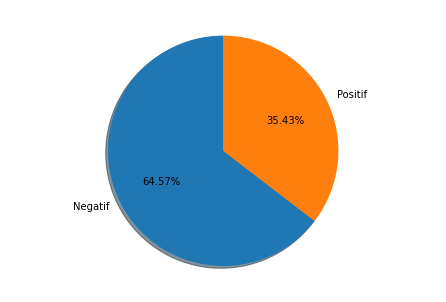

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
sentimen = ['Negatif', 'Positif']
Nilai = data['sentimen'].value_counts()
ax.pie(Nilai, labels=sentimen,autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

In [9]:
data['review']=data['review'].str.replace('(?:\@|https?\://)\S+', '')
data['review']=data['review'].str.replace('[^\w\s]',' ')
data['review']=data['review'].str.replace('#[^\s]+',' ')
#ilangin angka
data['review']=data['review'].str.replace('\d+',' ')
#ilangin enter
data['review']=data['review'].str.lower()
#ilangin spasi berlebih
data['review'] = data['review'].replace('\s+', ' ', regex=True)
#ilangin simbol
data['review'] = data['review'].replace('\n',' ',regex=True)
for i in data.columns:
    data[i][data[i].apply(lambda i: True if re.search(r'^\s*$', str(i)) else False)]=None

In [10]:
data['review'].to_csv('hasil cleaning.csv')

In [11]:
data

,username,review,nilai,sentimen
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif
2,Indonesia Defence,sangat mudah dan membantu,5,positif
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif
...,...,...,...,...
7795,ari cicir2014,sip,5,positif
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif
7797,Heru Hartanto,i love indonesian railways,5,positif
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif


In [12]:
from nltk.tokenize import word_tokenize 
##nltk.download()
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['tokenizing'] = data['review'].apply(word_tokenize_wrapper)


In [13]:
data

,username,review,nilai,sentimen,tokenizing
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]"
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]"
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ..."
...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip]
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]"
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,..."


In [14]:
from nltk.probability import FreqDist
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

data['frekuensi'] = data['tokenizing'].apply(freqDist_wrapper)

print(data['frekuensi'].apply(lambda x : x.most_common()))

0       [(parah, 1), (bgt, 1), (lemotnya, 1), (jdi, 1)...
1       [(di, 2), (kecewa, 1), (sih, 1), (udah, 1), (b...
2       [(sangat, 1), (mudah, 1), (dan, 1), (membantu,...
3       [(mau, 3), (pasword, 3), (di, 2), (banyak, 2),...
4       [(gak, 4), (muter, 2), (bisa, 2), (beli, 2), (...
                              ...                        
7795                                           [(sip, 1)]
7796            [(sangat, 1), (membantu, 1), (sekali, 1)]
7797    [(i, 1), (love, 1), (indonesian, 1), (railways...
7798    [(aja, 2), (sih, 2), (aplikasi, 2), (ngasih, 1...
7799                                        [(mantap, 1)]
Name: frekuensi, Length: 7500, dtype: object


In [15]:
data

,username,review,nilai,sentimen,tokenizing,frekuensi
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1..."
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'..."
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':..."
...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1}
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways..."
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ..."


In [16]:
from nltk.corpus import stopwords
import string 
import re #regex library

# ----------------------- STOPWORD -------------------------------
# stopword indonesia
list_stopwords = stopwords.words('english')


# ---------------------------- manualy add stopword  ------------------------------------
# additional stopword
list_stopwords.extend(['ini', 'dg', 'jdi', 'sih', 'di', 'ini', 'ya', 'aja', 'dong', 'ke', 'ni', 'nya', 'inii', 'yah', 'gini', 'lah', 'kog', 'sihh', 'pas', 'nge', 'itu', 'woyyy', 'deh', 'g', 'dah', 'duh', 'yg', 'udh', 'n', 'kok', 'lol', 'kan', 'se', 'sh', 'wkwk', 'jg', 'klo', 'd', 'dh', 'huhuhuhu', 'jd', 'akses', 'ttg', 'ih', 'dst', 'nih', 'it', 'woe', 'mnt', 'trs', 'ana', 'mo', 'loh', 'mw', 'yaa', 'min', 'ny', 'dr', 'kak', 'tadi', 'eh', 'zzzzz', 'tpi', 'wa', 'san', 'si', 'pp', 'or', 'ny', 'lg', 'va', 'sm', 'eeeeeeh', 'eeeeeeeeh', 'dg', 'lgi', 'ta', 'hhadeh', 'kek', 'heh', 'td', 'kl', 'tsb', 'lo', 'ehhh', 'in', 'af', 'si', 'dll', 'k', 'a', 'lgyy', 'kyk', 'ko', 'nah', 'kya', 'ber', 'oy', 'nya', 'iya', 'sll', 'sj', 'koq', 'ad', 'cb', 'bos', 'boyy', 'gi', 'dear', 'sich', 'loe', 'boss', 'm', 'skr', 'duuh', 'hmm', 'akpdjskjdjhx', 'kx', 'xkvx', 'msv', 'sovd', 'hhxgjdvdjn', 'fkfvdjkf', 'fibjd', 'dibjdejjeks', 'b', 'dkkdhldbd', 'tu', 'lsg', 'lg', 'yach', 'ud', 'tb', 'gb', 'l', 'sih', 'min', 'lu', 'haa', 'kah', 'og', 'da', 'lho', 'yaaa', 'la', 'an', 'nua', 'x', 'lahh', 'ihhh', 'aduuh', 'ya', 'dehhh', 'pak', 'peaen', 'tuh', 'bafu', 'gl', 'un', 'dsb', 'gag', 'mlh', 'dih', 'saja', 'hal', 'seee', 'haduhh', 'bin', 'nohp', 'cm', 'pny', 'gt', 'wong', 'dongggggggg', 'aj', 'aa', 'qa', 'ini', 'bozz', 'in', 'c', 'bs', 'ileh', 'dn', 'gx', 'luhg', 'loohh', 'sh', 'nie', 'lh', 'hhh', 'ahelah', 'donk', 'y', 'ky', 'hey', 'ini', 'ku', 'ne', 'ap', 'lurrrr', 'jga', 'ato', 'ehsdh', 'aja', 'lino', 'bli', 'jlek', 'h', 'iyah', 'hayo', 'ae', 'pa', 'ue', 'sana', 'lahini', 'bngtgk', 'sie', 'gnipa', 'lrbaranini', 'nihh', 'toh', 'pie', 'tdd', 'tuk', 'sah', 'hmmm', 'wus', 'jumm', 'jum', 'woi', 'yasy', 'mkn', 'tong', 'hadehh', 'tuuu', 'yh', 'ush', 'eeee', 'kah', 'huhuhu', 'brt', 'yaa', 'seh', 'hilihh', 'u', 'tq', 'ma', 'woiii', 'rb', 'kq', 'sih', 'lha', 'pnh', 'kang', 'wkwkwkwk', 'msa', 'kan', 'nyaa', 'thx', 'muluuu', 'dech', 'ya', 'qr', 'min', 'sd', 'pam', 'ss', 'ja', 'hihihi', 'deh', 'wkwkwk', 'ya', 'bgtu', 'dri', 'yll', 'lok', 'skg', 'th', 'yaa', 'terrrr', 'gi', 'pw', 'oops', 'ap', 'dl', 'wae', 'tikrt', 'kn', 'iniii', 'huff', 'st', 'rs', 'nyaaa', 'tks', 'ena', 'siih', 'sja', 'shg', 'hehe', 'mb', 'uu', 'rt', 'vt', 'bmi', 'rf', 'popdiinoimni', 'r', 'gtu', 'hy', 'num', 'yaw', 'hadee', 'hehh', 'ngan', 'bsg', 'minn', 'bae', 'c', 'helooo', 'wah', 'beuhh', 'yth', 'iy', 'buar', 'nihhhh', 'yaa', 'hadeh', 'iwk', 'e', 'sy', 'mi', 'elah', 'ehhhhh', 'bos', 'ajja', 'bun', 'bund', 'pak', 'smw', 'bapak', 'trusss', 'dii', 'hg', 'br', 'neh', 'cz', 'pakk', 'per', 'nihhh', 'ssah', 'enk', 'bi', 'y', 'cnp', 'kk', 'h', 'tross', 'ajaa', 'tok', 'dunk', 'iki', 'hadeeeeh', 'ala', 'ituu', 'w', 'nu', 'inj', 'mu', 'ini', 'terooooossssssssssssss', 'niku', 'a', 'c', 'e', 'teruz', 'bl', 'ng', 'wahh', 'lai', 'nda', 'az', 'huuuh', 'yaach', 'ajh', 'stb', 'gb', 'permisi', 'oi', 'nya', 'mmg', 'sihg', 'maw', 'mya', 'cuk', 'mang', 'aduh', 'hr', 'hmmmm', 'ah', 'lhooo', 'q', 'ehh', 'ntah', 'jk', 'dong', 'dkk', 'ta', 'lhaa', 'ca', 'cc', 'ba', 'woiii', 'yaad', 'unt', 'yaaa', 'huhuhuhuuuuuuu', 'yaaaaaaaaaaaaaaaa', 'buk', 't', 'sieh', 'an', 'ykpwt', 'yaaaa', 'noh', 'dll', 'an', 'haloooo', 'tuu', 'hai', 'krt', 'bla', 'duhh', 'NAME', 'pun', 'ups', 'yahh', 'dehh', 'nb', 'ge', 'siiiih', 'mba', 'nich', 'trx', 'dede', 'edward', 'old', 'nx', 'kloo', 'katax', 'hub', 'aaaaahhhhhh', 'dng', 'huuffff', 'ee', 'battttt', 'yia', 'donk', 'iuy', 'kah', 'ya', 'las', 'uuy', 'kook', 'wg', 'donggg', 'bu', 'hiks', 'hahaha', 'qt', 'nyasy', 'hi', 'tek', 'i', 'kuk', 'blass', 'ny', 'ex', 'cfh', 'abc', 'di', 'b', 'ahja', 'keknya', 'gc', 'doong', 'sihhh', 'sii', 'tauu', 'ak', 'ahh', 'laaaaaaa', 'syg', 'huffff', 'wkek', 'huh', 'hhhhhh', 'f', 'ssss', 'f', 'wt', 'r', 'sbb', 'halooo', 'py', 'xx', 'kah', 'daah', 'eeeeeeeeeeeeeee', 'eeeeeeeeeeeeeeueeeeeeeee', 'siii', 'lp', 'laa', 'oooyehh', 'cr', 'hehehe', 'oh', 'gituuuu', 'af', 'pol', 'sihh', 'aau', 'trussss', 'haloo', 'sii', 'wkwkek', 'looh', 'o', 'yra', 'te', 'p', 'pa', 'ybs', 're', 'coz', 'tis', 'sih', 'g', 's', 'naahh', 'th', 'ps', 'lanm', 'yeah', 'kov', 'be', 'kl', 'AM', 'djaja', 'kwoonggg', 'nybs', 'yoi', 'pnp', 'tk', 'pk', 'hlo', 'lur', 'ane', 'mwo', 'bosqueee', 'al', 'oc', 'lekk', 'lohh', 'hese', 'na', 'teu', 'perabaiki', 'kareta', 'hararese', 'rrr', 'ooooopppppppp', 'an', 'thn', 'oiya', 'aaa', 'huuhhh', 'th', 'oer', 'ajj', 'dech', 'ac', 'tut', 'tuuuut', 'hum', 'yk', 'wkkw', 'its', 'mkc', 'jfn', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'its', 'jfn', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'x', 'y', 'z', 'pm'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['hasil_stopword_removal'] = data['tokenizing'].apply(stopwords_removal) 


print(data['hasil_stopword_removal'])


0             [parah, bgt, lemotnya, susah, pesen, tiket]
1       [kecewa, udah, berhasil, melakukan, pembayaran...
2                          [sangat, mudah, dan, membantu]
3       [tolong, respon, pt, kai, aplikasi, butuh, ban...
4       [ampuuuun, sudah, update, versi, terbaru, tapi...
                              ...                        
7795                                                [sip]
7796                           [sangat, membantu, sekali]
7797                         [love, indonesian, railways]
7798    [ngasih, bintang, dulu, aplikasinya, bagus, cu...
7799                                             [mantap]
Name: hasil_stopword_removal, Length: 7500, dtype: object


In [17]:
data

,username,review,nilai,sentimen,tokenizing,frekuensi,hasil_stopword_removal
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1...","[parah, bgt, lemotnya, susah, pesen, tiket]"
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':...","[kecewa, udah, berhasil, melakukan, pembayaran..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'...","[sangat, mudah, dan, membantu]"
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '...","[tolong, respon, pt, kai, aplikasi, butuh, ban..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':...","[ampuuuun, sudah, update, versi, terbaru, tapi..."
...,...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1},[sip]
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}","[sangat, membantu, sekali]"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways...","[love, indonesian, railways]"
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ...","[ngasih, bintang, dulu, aplikasinya, bagus, cu..."


In [18]:
data_stopword = pd.DataFrame(list_stopwords)
# data_stopword.to_csv('daftar_stopword.csv')
data_stopword

,0
0,
1,against
2,trs
3,ana
4,kya
...,...
689,sm
690,hadn
691,nihhhh
692,djaja


In [19]:
#  ------ NORMALIZE ---------

normalizad_word = pd.read_excel("normal.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['text_normalized'] = data['tokenizing'].apply(normalized_term)

In [20]:
data

,username,review,nilai,sentimen,tokenizing,frekuensi,hasil_stopword_removal,text_normalized
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1...","[parah, bgt, lemotnya, susah, pesen, tiket]","[parah, bgt, lemotnya, jdi, susah, pesen, tiket]"
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':...","[kecewa, udah, berhasil, melakukan, pembayaran...","[kecewa, sih, udah, berhasil, melakukan, pemba..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'...","[sangat, mudah, dan, membantu]","[sangat, mudah, dan, membantu]"
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '...","[tolong, respon, pt, kai, aplikasi, butuh, ban...","[tolong, di, respon, pt, kai, aplikasi, ini, b..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':...","[ampuuuun, sudah, update, versi, terbaru, tapi...","[ya, ampuuuun, sudah, update, versi, terbaru, ..."
...,...,...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1},[sip],[sip]
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}","[sangat, membantu, sekali]","[sangat, membantu, sekali]"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways...","[love, indonesian, railways]","[i, love, indonesian, railways]"
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ...","[ngasih, bintang, dulu, aplikasinya, bagus, cu...","[ngasih, bintang, aja, dulu, aplikasinya, sih,..."


In [21]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# ------ STEMMING ---------

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['text_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
# print(len(term_dict))
# print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
#     print(term,":" ,term_dict[term])
    
# print(term_dict)
# print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['stemming'] = data['text_normalized'].swifter.apply(get_stemmed_term)
print(data['stemming'])


0               [parah, bgt, lot, jdi, susah, sen, tiket]
1       [kecewa, sih, udah, hasil, laku, bayar, lewat,...
2                             [sangat, mudah, dan, bantu]
3       [tolong, di, respon, pt, kai, aplikasi, ini, b...
4       [ya, ampuuuun, sudah, update, versi, baru, tap...
                              ...                        
7795                                                [sip]
7796                              [sangat, bantu, sekali]
7797                      [i, love, indonesian, railways]
7798    [ngasih, bintang, aja, dulu, aplikasi, sih, ba...
7799                                             [mantap]
Name: stemming, Length: 7500, dtype: object


In [22]:
data

,username,review,nilai,sentimen,tokenizing,frekuensi,hasil_stopword_removal,text_normalized,stemming
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1...","[parah, bgt, lemotnya, susah, pesen, tiket]","[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","[parah, bgt, lot, jdi, susah, sen, tiket]"
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':...","[kecewa, udah, berhasil, melakukan, pembayaran...","[kecewa, sih, udah, berhasil, melakukan, pemba...","[kecewa, sih, udah, hasil, laku, bayar, lewat,..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'...","[sangat, mudah, dan, membantu]","[sangat, mudah, dan, membantu]","[sangat, mudah, dan, bantu]"
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '...","[tolong, respon, pt, kai, aplikasi, butuh, ban...","[tolong, di, respon, pt, kai, aplikasi, ini, b...","[tolong, di, respon, pt, kai, aplikasi, ini, b..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':...","[ampuuuun, sudah, update, versi, terbaru, tapi...","[ya, ampuuuun, sudah, update, versi, terbaru, ...","[ya, ampuuuun, sudah, update, versi, baru, tap..."
...,...,...,...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1},[sip],[sip],[sip]
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}","[sangat, membantu, sekali]","[sangat, membantu, sekali]","[sangat, bantu, sekali]"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways...","[love, indonesian, railways]","[i, love, indonesian, railways]","[i, love, indonesian, railways]"
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ...","[ngasih, bintang, dulu, aplikasinya, bagus, cu...","[ngasih, bintang, aja, dulu, aplikasinya, sih,...","[ngasih, bintang, aja, dulu, aplikasi, sih, ba..."


In [23]:
data['stemming'] = data['stemming'].apply(str)
data

,username,review,nilai,sentimen,tokenizing,frekuensi,hasil_stopword_removal,text_normalized,stemming
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1...","[parah, bgt, lemotnya, susah, pesen, tiket]","[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","['parah', 'bgt', 'lot', 'jdi', 'susah', 'sen',..."
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':...","[kecewa, udah, berhasil, melakukan, pembayaran...","[kecewa, sih, udah, berhasil, melakukan, pemba...","['kecewa', 'sih', 'udah', 'hasil', 'laku', 'ba..."
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'...","[sangat, mudah, dan, membantu]","[sangat, mudah, dan, membantu]","['sangat', 'mudah', 'dan', 'bantu']"
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '...","[tolong, respon, pt, kai, aplikasi, butuh, ban...","[tolong, di, respon, pt, kai, aplikasi, ini, b...","['tolong', 'di', 'respon', 'pt', 'kai', 'aplik..."
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':...","[ampuuuun, sudah, update, versi, terbaru, tapi...","[ya, ampuuuun, sudah, update, versi, terbaru, ...","['ya', 'ampuuuun', 'sudah', 'update', 'versi',..."
...,...,...,...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1},[sip],[sip],['sip']
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}","[sangat, membantu, sekali]","[sangat, membantu, sekali]","['sangat', 'bantu', 'sekali']"
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways...","[love, indonesian, railways]","[i, love, indonesian, railways]","['i', 'love', 'indonesian', 'railways']"
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ...","[ngasih, bintang, dulu, aplikasinya, bagus, cu...","[ngasih, bintang, aja, dulu, aplikasinya, sih,...","['ngasih', 'bintang', 'aja', 'dulu', 'aplikasi..."


In [24]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
data['gabung'] = data['stemming'].apply(join_text_list)
data

,username,review,nilai,sentimen,tokenizing,frekuensi,hasil_stopword_removal,text_normalized,stemming,gabung
0,hardy yosefan,parah bgt lemotnya jdi susah pesen tiket,1,negatif,"[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","{'parah': 1, 'bgt': 1, 'lemotnya': 1, 'jdi': 1...","[parah, bgt, lemotnya, susah, pesen, tiket]","[parah, bgt, lemotnya, jdi, susah, pesen, tiket]","['parah', 'bgt', 'lot', 'jdi', 'susah', 'sen',...",parah bgt lot jdi susah sen tiket
1,Karin Nadhea,kecewa sih udah berhasil melakukan pembayaran ...,1,negatif,"[kecewa, sih, udah, berhasil, melakukan, pemba...","{'kecewa': 1, 'sih': 1, 'udah': 1, 'berhasil':...","[kecewa, udah, berhasil, melakukan, pembayaran...","[kecewa, sih, udah, berhasil, melakukan, pemba...","['kecewa', 'sih', 'udah', 'hasil', 'laku', 'ba...",kecewa sih udah hasil laku bayar lewat shopeep...
2,Indonesia Defence,sangat mudah dan membantu,5,positif,"[sangat, mudah, dan, membantu]","{'sangat': 1, 'mudah': 1, 'dan': 1, 'membantu'...","[sangat, mudah, dan, membantu]","[sangat, mudah, dan, membantu]","['sangat', 'mudah', 'dan', 'bantu']",sangat mudah dan bantu
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,1,negatif,"[tolong, di, respon, pt, kai, aplikasi, ini, b...","{'tolong': 1, 'di': 2, 'respon': 1, 'pt': 1, '...","[tolong, respon, pt, kai, aplikasi, butuh, ban...","[tolong, di, respon, pt, kai, aplikasi, ini, b...","['tolong', 'di', 'respon', 'pt', 'kai', 'aplik...",tolong di respon pt kai aplikasi ini butuh ban...
4,Satu Enam,ya ampuuuun sudah update versi terbaru tapi cu...,1,negatif,"[ya, ampuuuun, sudah, update, versi, terbaru, ...","{'ya': 1, 'ampuuuun': 1, 'sudah': 1, 'update':...","[ampuuuun, sudah, update, versi, terbaru, tapi...","[ya, ampuuuun, sudah, update, versi, terbaru, ...","['ya', 'ampuuuun', 'sudah', 'update', 'versi',...",ya ampuuuun sudah update versi baru tapi cuma ...
...,...,...,...,...,...,...,...,...,...,...
7795,ari cicir2014,sip,5,positif,[sip],{'sip': 1},[sip],[sip],['sip'],sip
7796,FATACHUDIN LATIF,sangat membantu sekali,3,positif,"[sangat, membantu, sekali]","{'sangat': 1, 'membantu': 1, 'sekali': 1}","[sangat, membantu, sekali]","[sangat, membantu, sekali]","['sangat', 'bantu', 'sekali']",sangat bantu sekali
7797,Heru Hartanto,i love indonesian railways,5,positif,"[i, love, indonesian, railways]","{'i': 1, 'love': 1, 'indonesian': 1, 'railways...","[love, indonesian, railways]","[i, love, indonesian, railways]","['i', 'love', 'indonesian', 'railways']",i love indonesian railways
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasinya sih bagus ...,4,positif,"[ngasih, bintang, aja, dulu, aplikasinya, sih,...","{'ngasih': 1, 'bintang': 1, 'aja': 2, 'dulu': ...","[ngasih, bintang, dulu, aplikasinya, bagus, cu...","[ngasih, bintang, aja, dulu, aplikasinya, sih,...","['ngasih', 'bintang', 'aja', 'dulu', 'aplikasi...",ngasih bintang aja dulu aplikasi sih bagus cum...


In [25]:
data_fix=pd.concat([data.username,data['gabung'],data.sentimen],axis=1)

In [26]:
data_fix

,username,gabung,sentimen
0,hardy yosefan,parah bgt lot jdi susah sen tiket,negatif
1,Karin Nadhea,kecewa sih udah hasil laku bayar lewat shopeep...,negatif
2,Indonesia Defence,sangat mudah dan bantu,positif
3,Bayu Sandra,tolong di respon pt kai aplikasi ini butuh ban...,negatif
4,Satu Enam,ya ampuuuun sudah update versi baru tapi cuma ...,negatif
...,...,...,...
7795,ari cicir2014,sip,positif
7796,FATACHUDIN LATIF,sangat bantu sekali,positif
7797,Heru Hartanto,i love indonesian railways,positif
7798,Febrianna Sakti,ngasih bintang aja dulu aplikasi sih bagus cum...,positif


In [27]:
tf_idf = TfidfVectorizer(binary=True)
tfidf_mat = tf_idf.fit_transform(data_fix["gabung"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)
data_fix['gabung']

TF-IDF  <class 'numpy.ndarray'> (7500, 5605)


0                       parah bgt lot jdi susah sen tiket
1       kecewa sih udah hasil laku bayar lewat shopeep...
2                                  sangat mudah dan bantu
3       tolong di respon pt kai aplikasi ini butuh ban...
4       ya ampuuuun sudah update versi baru tapi cuma ...
                              ...                        
7795                                                  sip
7796                                  sangat bantu sekali
7797                           i love indonesian railways
7798    ngasih bintang aja dulu aplikasi sih bagus cum...
7799                                               mantap
Name: gabung, Length: 7500, dtype: object

In [28]:
terms = tf_idf.get_feature_names()

#sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

#connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print_rank = ranking.sort_values('rank', ascending=True)
print_rank.head(20)
nilai_idf_perkata = pd.DataFrame(data)
nilai_idf_perkata.sort_values(1, ascending=True)

,0,1
3162,mksd,0.154384
1308,dplihan,0.154384
3233,msti,0.154384
2656,lbi,0.154384
5201,tolg,0.154384
...,...,...
391,bagus,225.227203
5127,tiket,226.818394
4377,sangat,237.326635
282,aplikasi,237.500730


In [29]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()
clf = MultinomialNB()
X=data_fix.gabung
Y=data_fix.sentimen

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 6000
Banyak data x_test  : 1500
Banyak data y_train : 6000
Banyak data y_test  : 1500


In [31]:
y_test.value_counts()

negatif    955
positif    545
Name: sentimen, dtype: int64

In [32]:
y_train.value_counts()

negatif    3888
positif    2112
Name: sentimen, dtype: int64

<ipython-input-33-9ca31c8bb0c8>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x, labels)


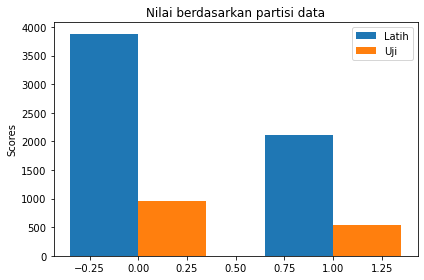

In [33]:
labels = ['Positif', 'Negatif']
Data_latih = y_train.value_counts()
Data_uji = y_test.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Data_latih, width, label='Latih')
rects2 = ax.bar(x + width/2, Data_uji, width, label='Uji')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Nilai berdasarkan partisi data')
ax.set_xticks(x, labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [34]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf)])
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [35]:
akurasi2 = cross_val_score(model, x_train, y_train, cv = 2, n_jobs = -1)
presisi2 = cross_val_score(model, x_train, y_train, cv=2, scoring='precision_macro')
recall2 = cross_val_score(model, x_train, y_train, cv=2, scoring='recall_macro')
hasil2 = {
    'Akurasi' : akurasi2*100,
    'Presisi' : presisi2*100,
    'Recall' : recall2*100
}
hasil2 = round(pd.DataFrame(hasil2),2)
hasil2

,Akurasi,Presisi,Recall
0,88.50,91.54,84.05
1,87.33,91.04,82.31


In [36]:
akurasi3 = cross_val_score(model, x_train, y_train, cv = 3, n_jobs = -1)
presisi3 = cross_val_score(model, x_train, y_train, cv=3, scoring='precision_macro')
recall3 = cross_val_score(model, x_train, y_train, cv=3, scoring='recall_macro')
hasil3 = {
    'Akurasi' : akurasi3*100,
    'Presisi' : presisi3*100,
    'Recall' : recall3*100
}
hasil3 = round(pd.DataFrame(hasil3),2)
hasil3

,Akurasi,Presisi,Recall
0,88.95,91.82,84.69
1,88.35,91.37,83.87
2,87.85,91.29,83.07


In [37]:
akurasi4 = cross_val_score(model, x_train, y_train, cv = 4, n_jobs = -1)
presisi4 = cross_val_score(model, x_train, y_train, cv=4, scoring='precision_macro')
recall4 = cross_val_score(model, x_train, y_train, cv=4, scoring='recall_macro')
hasil4 = {
    'Akurasi' : akurasi4*100,
    'Presisi' : presisi4*100,
    'Recall' : recall4*100
}
hasil4 = round(pd.DataFrame(hasil4),2)
hasil4

,Akurasi,Presisi,Recall
0,88.87,91.96,84.49
1,89.00,91.76,84.81
2,88.00,91.04,83.43
3,87.93,91.39,83.16


In [38]:
akurasi5 = cross_val_score(model, x_train, y_train, cv = 5, n_jobs = -1)
presisi5 = cross_val_score(model, x_train, y_train, cv=5, scoring='precision_macro')
recall5 = cross_val_score(model, x_train, y_train, cv=5, scoring='recall_macro')
hasil5 = {
    'Akurasi' : akurasi5*100,
    'Presisi' : presisi5*100,
    'Recall' : recall5*100
}
hasil5 = round(pd.DataFrame(hasil5),2)
hasil5

,Akurasi,Presisi,Recall
0,89.17,92.09,84.96
1,88.67,91.21,84.52
2,88.58,91.62,84.15
3,88.75,91.84,84.33
4,87.42,91.03,82.43


In [39]:
akurasi6 = cross_val_score(model, x_train, y_train, cv = 6, n_jobs = -1)
presisi6 = cross_val_score(model, x_train, y_train, cv=6, scoring='precision_macro')
recall6 = cross_val_score(model, x_train, y_train, cv=6, scoring='recall_macro')
hasil6 = {
    'Akurasi' : akurasi6*100,
    'Presisi' : presisi6*100,
    'Recall' : recall6*100
}
hasil6 = round(pd.DataFrame(hasil6),2)
hasil6

,Akurasi,Presisi,Recall
0,89.3,92.32,85.06
1,89.3,91.77,85.32
2,89.4,92.10,85.33
3,87.8,90.67,83.25
4,88.6,91.89,84.07
5,87.6,90.99,82.78


In [40]:
akurasi8 = cross_val_score(model, x_train, y_train, cv = 8, n_jobs = -1)
presisi8 = cross_val_score(model, x_train, y_train, cv=8, scoring='precision_macro')
recall8 = cross_val_score(model, x_train, y_train, cv=8, scoring='recall_macro')
hasil8 = {
    'Akurasi' : akurasi8*100,
    'Presisi' : presisi8*100,
    'Recall' : recall8*100
}
hasil8 = round(pd.DataFrame(hasil8),2)
hasil8

,Akurasi,Presisi,Recall
0,90.00,92.74,86.05
1,88.53,91.66,84.06
2,89.20,91.20,85.44
3,89.33,92.53,85.02
4,87.73,90.77,83.09
5,88.40,91.38,83.96
6,88.53,91.85,83.97
7,87.47,91.01,82.54


In [41]:
akurasi10 = cross_val_score(model, x_train, y_train, cv = 10, n_jobs = -1)
presisi10 = cross_val_score(model, x_train, y_train, cv=10, scoring='precision_macro')
recall10 = cross_val_score(model, x_train, y_train, cv=10, scoring='recall_macro')
hasil10 = {
    'Akurasi' : akurasi10*100,
    'Presisi' : presisi10*100,
    'Recall' : recall10*100
}
hasil10 = round(pd.DataFrame(hasil10),2)
hasil10

,Akurasi,Presisi,Recall
0,89.33,92.19,85.23
1,89.33,92.19,85.23
2,88.67,91.55,84.32
3,90.00,91.79,86.54
4,89.83,92.74,85.76
5,88.00,90.89,83.48
6,88.00,91.13,83.37
7,89.33,91.97,85.27
8,88.00,91.38,83.26
9,88.17,91.48,83.50


In [42]:
hasil_uji_validasi=model.predict(x_test)
pd.DataFrame(hasil_uji_validasi).value_counts()

negatif    1111
positif     389
dtype: int64

In [43]:
y_test.value_counts()

negatif    955
positif    545
Name: sentimen, dtype: int64

              precision    recall  f1-score   support

     negatif       0.86      1.00      0.92       955
     positif       0.99      0.71      0.82       545

    accuracy                           0.89      1500
   macro avg       0.92      0.85      0.87      1500
weighted avg       0.90      0.89      0.89      1500



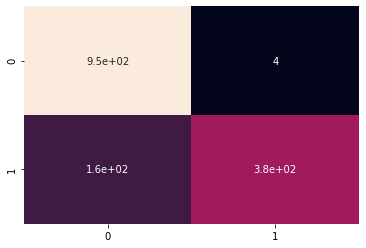

In [44]:
print(classification_report(y_test, hasil_uji_validasi))
      
sns.heatmap(confusion_matrix(y_test,hasil_uji_validasi), cbar=False, annot=True)

ac = accuracy_score(y_test, hasil_uji_validasi)
# acclist.append(ac)

In [90]:
hasil_klasifikasi = {
        'Data Uji Validasi' : x_test,
        'aktual' : y_test,
        'kalsifikasi' : hasil_uji_validasi
}
hasil_klasifikasi = pd.DataFrame(hasil_klasifikasi)
hasil_klasifikasi
hasil_klasifikasi.to_csv('hasil klasifikasi.csv')


In [46]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; error={:0.4f}'.format(accuracy, misclass))
    plt.savefig('hasil.png',bbox_inches='tight')
    plt.show()
    

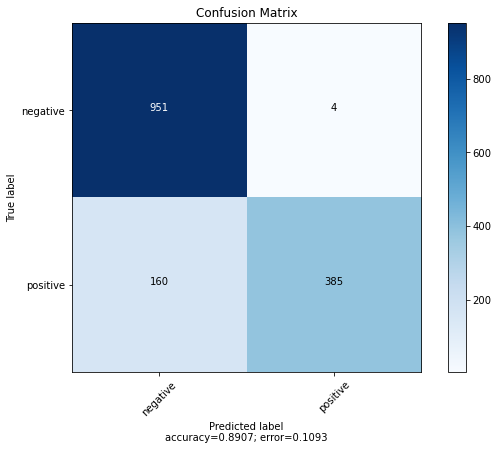

In [47]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,hasil_uji_validasi), 
                      normalize    = False,
                      target_names = ['negative','positive'],
                      title        = "Confusion Matrix")

In [48]:
cm1 = confusion_matrix(y_test, hasil_uji_validasi)
TN = cm1[0][0]
FN = cm1[0][1]
FP = cm1[1][0]
TP = cm1[1][1]

print('True Positive : ', TP)
print('False Positive : ', FP)
print('True Negative : ', TN)
print('False Negative : ', FN)
print('-----------------------')
print('Akurasi : ', round((TP+TN)/(TP+TN+FP+FN), 4)*100)
print('Presisi : ', round((TP)/(TP+FP), 4)*100)
print('Recall : ', round(TP/(TP+FN), 5)*100)

True Positive :  385
False Positive :  160
True Negative :  951
False Negative :  4
-----------------------
Akurasi :  89.07000000000001
Presisi :  70.64
Recall :  98.97200000000001


In [66]:
data2 = pd.read_csv('data_sentimen.csv')
POS_data = data2[(data2['sentimen'] == 'positif')]
NEG_data = data2[(data2['sentimen'] == 'negatif')]

In [72]:
POS_data['review']

2                               Sangat mudah dan membantu
8       Terima kasih KAI, sudah cepat tanggap melayani...
10                                                     ok
18      Mantap memudahkan saya untuk pesen tiket tanpa...
28      Matur Sembah Muwun KAI, Adanya Aplikasi KAI Ac...
                              ...                        
7795                                                  Sip
7796                               Sangat membantu sekali
7797                           I love indonesian railways
7798    Ngasih bintang 4 aja dulu. Aplikasinya sih bag...
7799                                               Mantap
Name: review, Length: 2657, dtype: object

In [94]:
from collections import defaultdict
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['review']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['review']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['review']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})
df_top_positive_tri.to_csv('positif 3 kata.csv')
df_top_positive_bi.to_csv('positif 2 kata.csv')
df_top_positive.to_csv('positif 1 kata.csv')

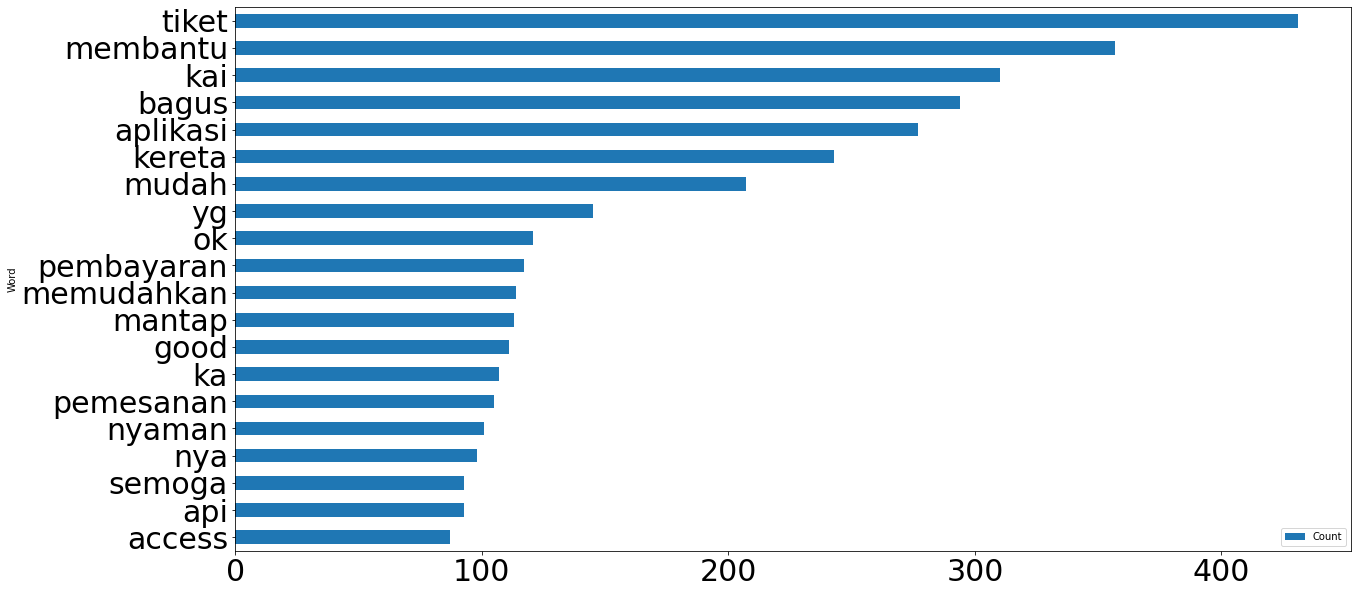

In [92]:
df_top_positive.head(20).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('kata-pos.png',bbox_inches='tight')

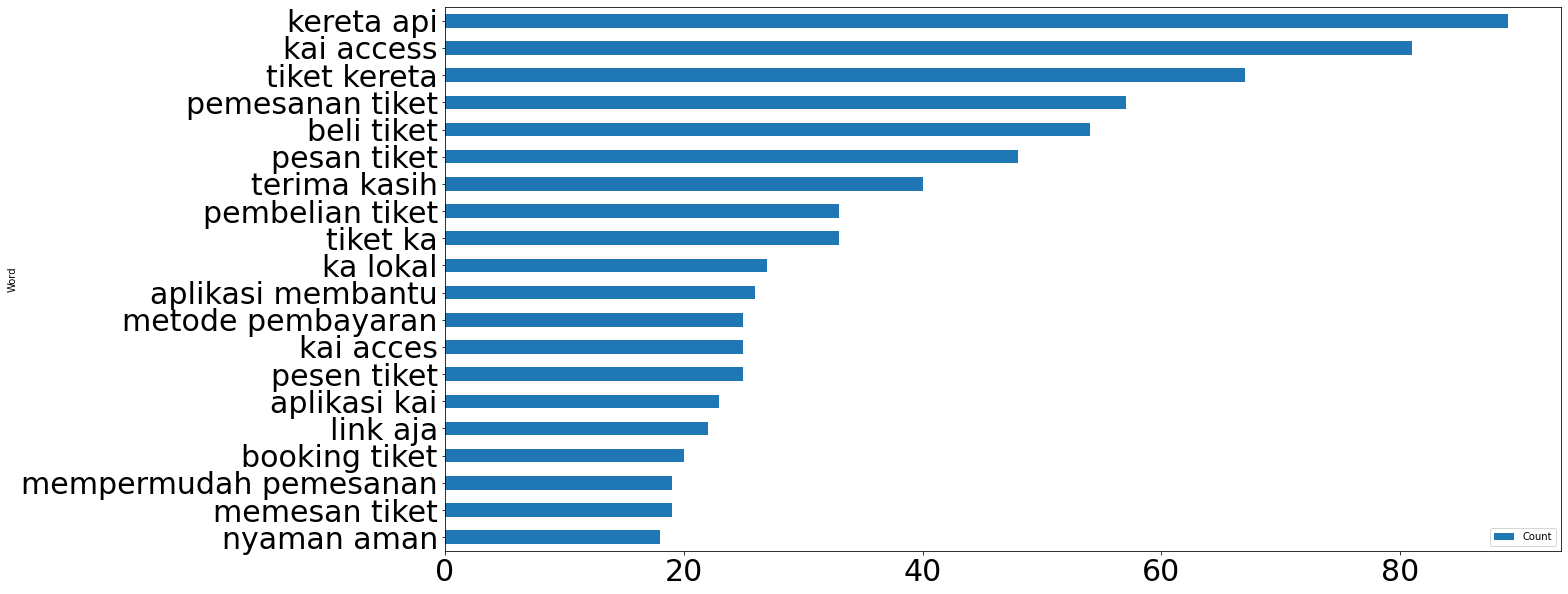

In [82]:
df_top_positive_bi.head(20).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('haha1.png',bbox_inches='tight')

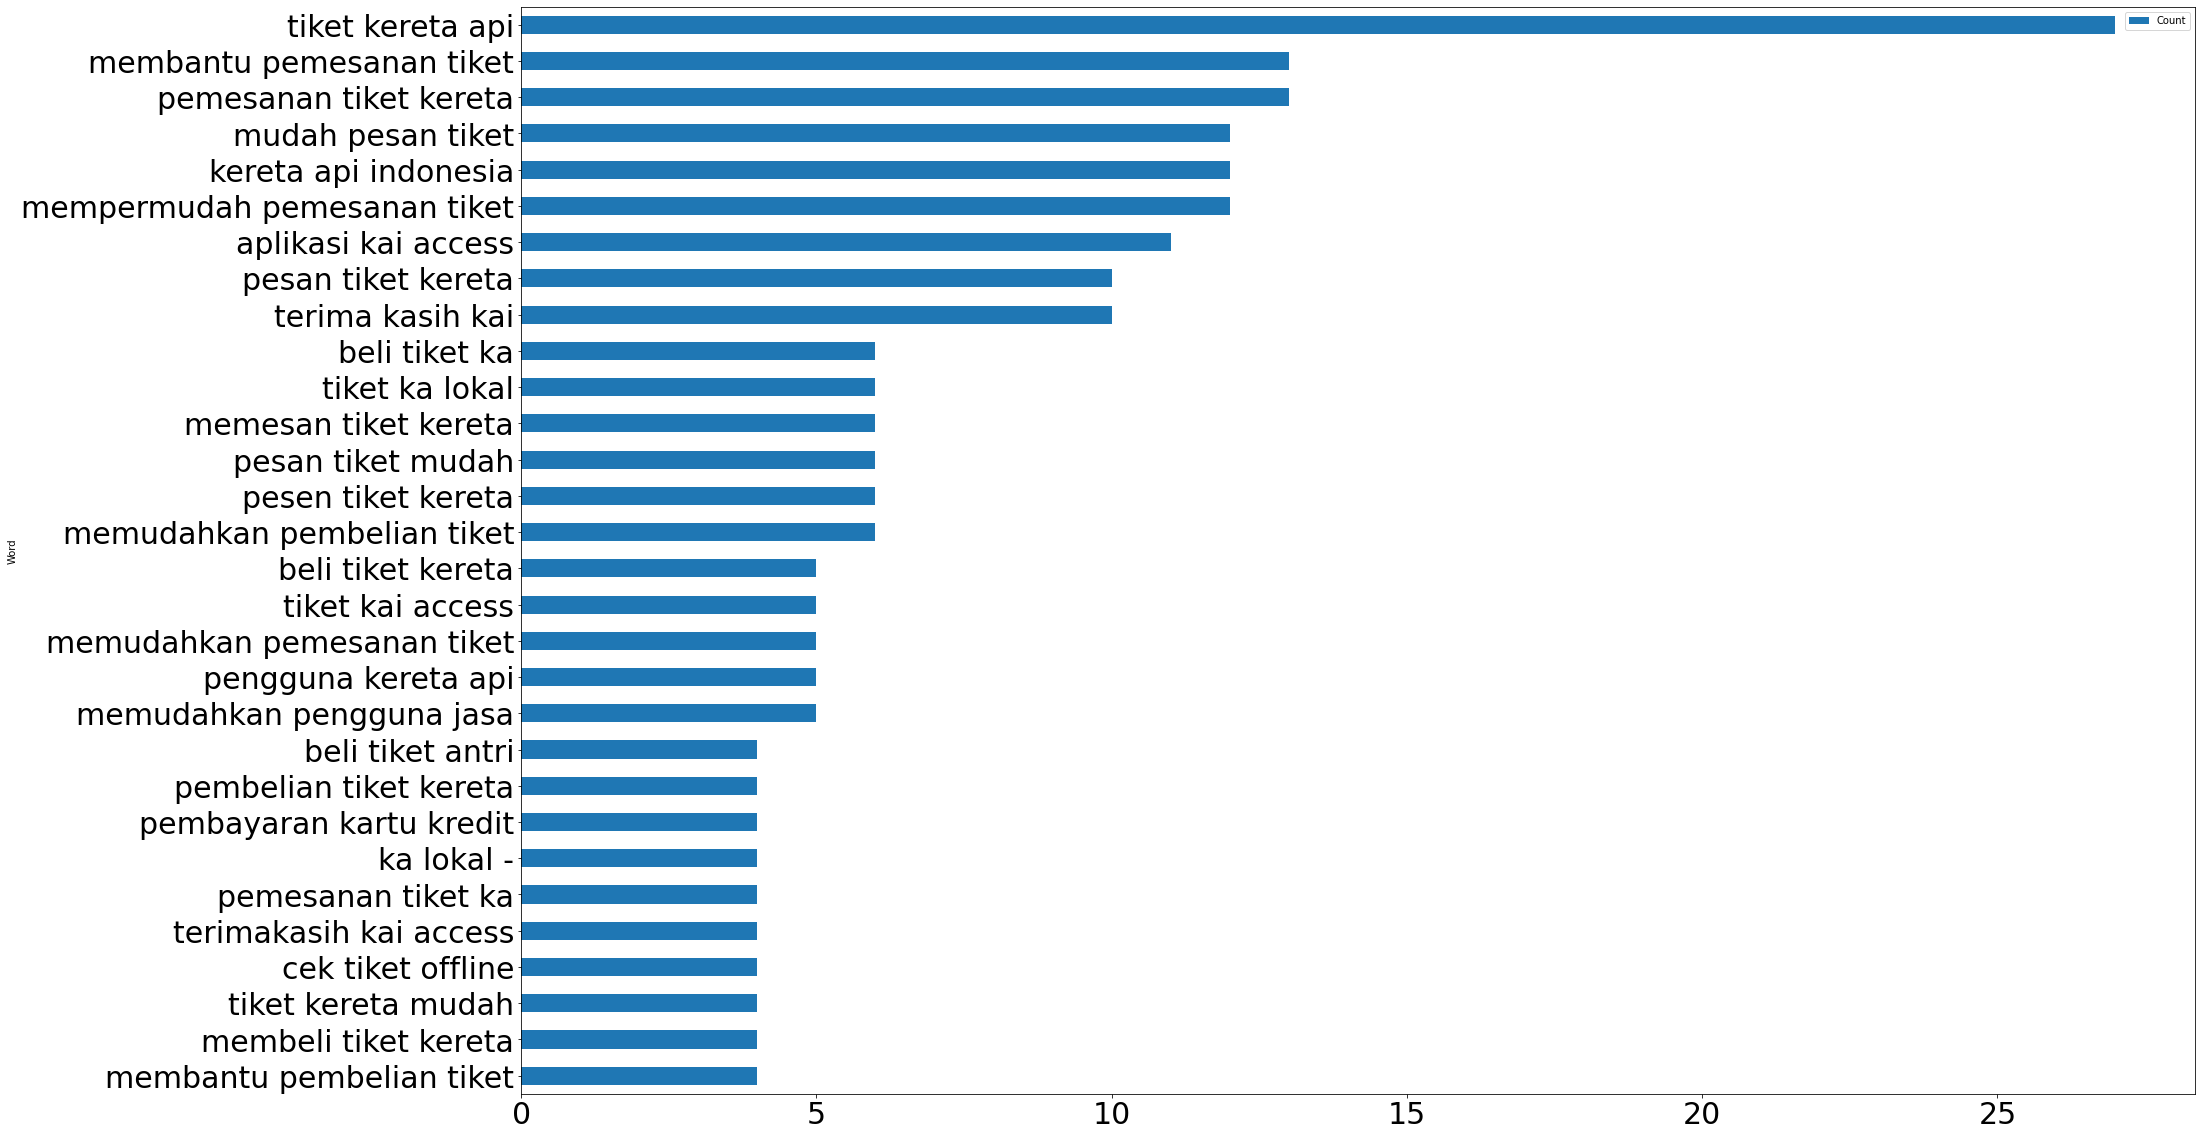

In [85]:
df_top_positive_tri.head(30).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(30,20),fontsize=30)
plt.savefig('haha2.png',bbox_inches='tight')

### Negatif

In [95]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['review']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['review']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['review']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})
df_top_negative.to_csv('negatif 1 kata.csv')
df_top_negative_bi.to_csv('negatif 2 kata.csv')
df_top_negative_tri.to_csv('negatif 3 kata.csv')

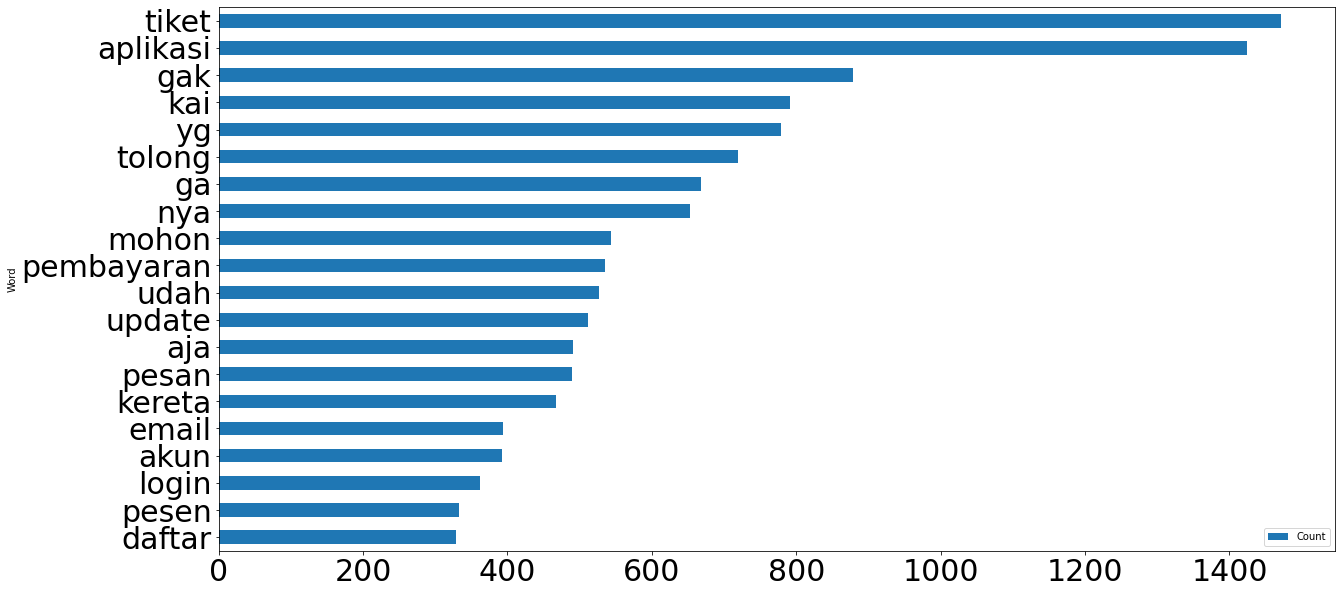

In [87]:
df_top_negative.head(20).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi.png',bbox_inches='tight')

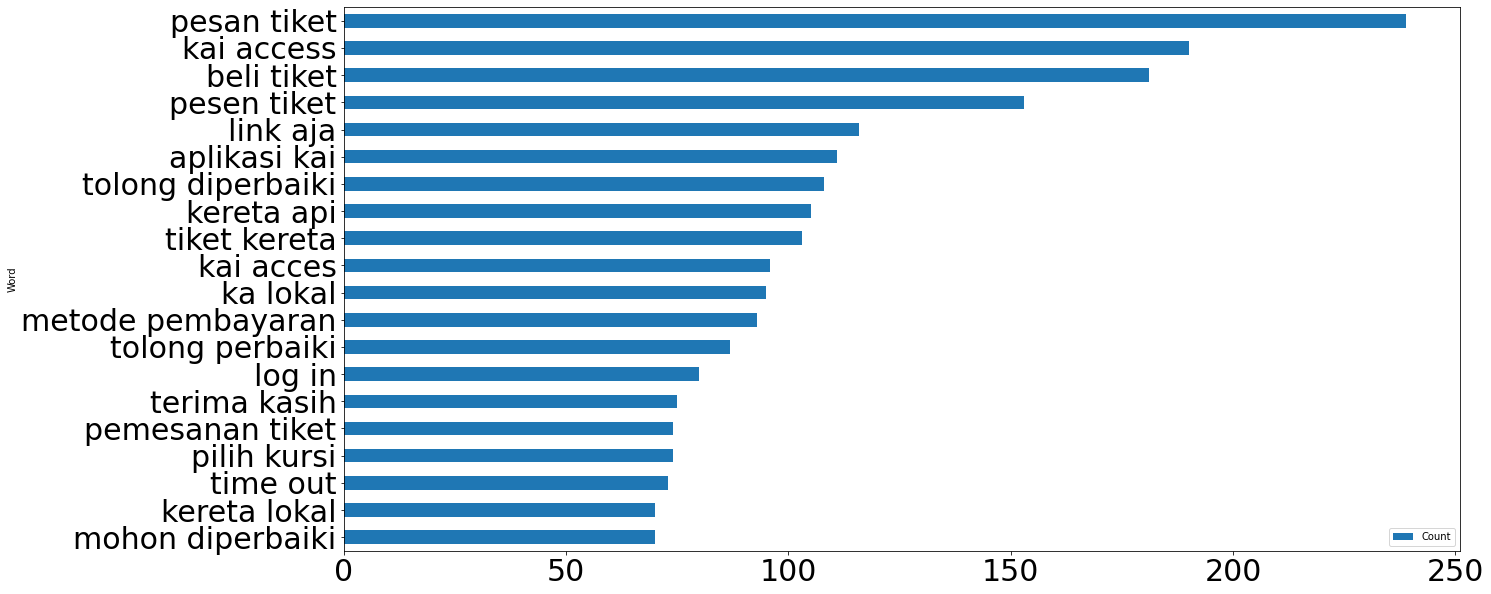

In [88]:
df_top_negative_bi.head(20).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi1.png',bbox_inches='tight')

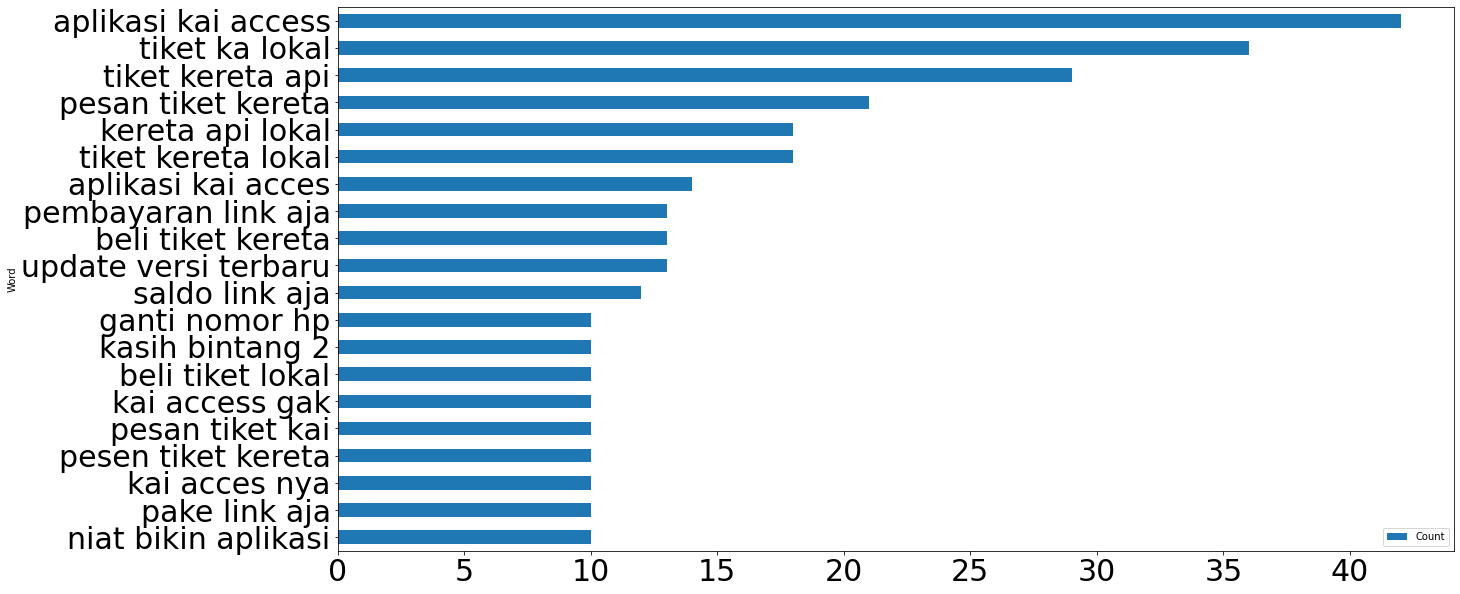

In [89]:
df_top_negative_tri.head(20).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('hihi2.png',bbox_inches='tight')